In [1]:
import torch
from torch import nn
import traintools

2025-08-19 00:51:50,629 - INFO - NumExpr defaulting to 16 threads.


In [4]:
net = nn.Sequential(
    # 输入为(1,224,224)
    nn.Conv2d(1,96,kernel_size=11,stride=4,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(96,256,kernel_size=5,padding=2),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 连续三层卷积层
    nn.Conv2d(256,384,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.Conv2d(384,384,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.Conv2d(384,256,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    nn.Linear(6400,4096),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096,4096),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096,10)
)

In [5]:
X  = torch.randn(size=(1,1,224,224))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t',X.shape)

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

In [6]:
batch_size = 128
train_iter, test_iter = traintools.load_data_fashion_mnist(batch_size, resize=224)

training on cuda:0
epoch 1, loss 1.394, train acc 0.486, test acc 0.704
epoch 2, loss 0.651, train acc 0.754, test acc 0.795
epoch 3, loss 0.535, train acc 0.801, test acc 0.822
epoch 4, loss 0.467, train acc 0.828, test acc 0.827
epoch 5, loss 0.426, train acc 0.844, test acc 0.849
epoch 6, loss 0.395, train acc 0.856, test acc 0.866
epoch 7, loss 0.372, train acc 0.864, test acc 0.866
epoch 8, loss 0.352, train acc 0.872, test acc 0.872
epoch 9, loss 0.340, train acc 0.876, test acc 0.875
epoch 10, loss 0.326, train acc 0.879, test acc 0.883


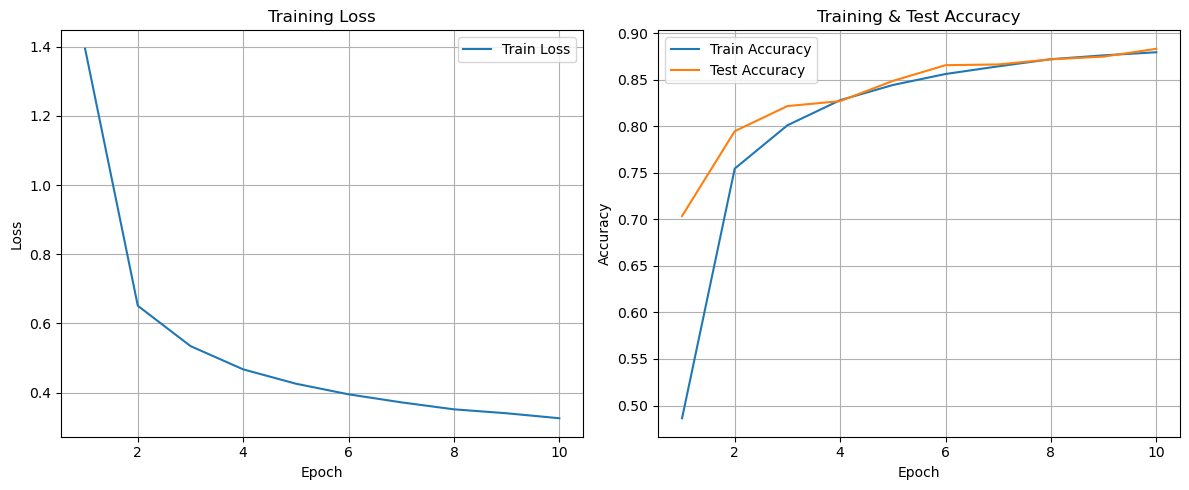

loss 0.326, train acc 0.879, test acc 0.883


In [9]:
lr,num_epochs = 0.01,10
traintools.train_ch6(
    net, train_iter, test_iter, num_epochs,lr,traintools.try_gpu()
)